## Problem Statement

Predict the Bidding outcome.

a) IT firms compete for winning large deals by designing and proposing solutions to their clients. The deal value can reach up to millions of dollars, which leads to highly competitive bidding processes. Even a marginal improvement in the win rate can result into substantial revenue addition for IT firm.

b) By predicting the probability of winning a deal, the engagement teams can prioritize the pipeline of opportunities to staff the most attractive options first. With the probability of winning known in advance, deal engagement manager can ensure that for the most profitable deals there are resources available.

c) Identify the best bid manager-SBU Head combination who can convert an opportunity to win with the provided data points.
 
d) Predictive Analytics - Build a ML model to predict the probability of win/loss for bidding activities for a potential client.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support


In [2]:
# Importing the data
df = pd.read_excel('Win_Prediction_Data.xlsx')

In [3]:
df

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [4]:
#Summerizing all the info related to dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


## Data Cleaning 

In [5]:
#14 duplicate values
df.duplicated().sum()

14

In [6]:
# checking duplicate data
df[df.duplicated()]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost
7705,Internal,Solution 9,2015-01-06,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,Lost
7718,Services_based,Solution 26,2018-02-11,Sector 17,L10,Molly Eakes,vansu dev,264705.88,Lost
8020,Internal,Solution 9,2015-07-02,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,Lost
8167,Infrastructure,Solution 9,2015-05-18,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,Lost
8177,Services_based,Solution 9,2015-10-03,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,Lost


In [7]:
# removing duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
#checking missing values
df.isnull().sum()        

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [10]:
dup=df[df["Client Category"].isnull()]
dup

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
488,NaN,Solution 7,2018-10-05,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
491,NaN,Solution 7,2019-01-06,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
518,NaN,Solution 10,2012-01-12,Sector 19,L10,Mangesh K. Singh,Hardeep Suksma,38235.29,Won
732,NaN,Solution 10,2013-11-08,Sector 23,L10,Rosanna Maynez,Sohil Kumar,58823.53,Won
1128,NaN,Solution 37,2013-09-27,Sector 24,L10,Mervin Harwood,Marcelo Riles,311764.71,Lost
...,...,...,...,...,...,...,...,...,...
9477,NaN,Solution 32,2018-09-26,Sector 23,L10,Long Bergstrom,Md Irshad,588235.29,Lost
9753,NaN,Solution 9,2018-08-04,Sector 19,L10,Gopa Trilochana,Darla Dickinson,485294.12,Won
9819,NaN,Solution 9,2018-09-15,Sector 19,L10,Clinton Mani,Sanchita Gulati,720588.24,Won
9904,NaN,Solution 14,2018-11-29,Sector 12,L10,Mangesh K. Singh,keshar ansari,529411.77,Won


In [11]:
# % of missing value
df['Client Category'].isnull().mean()

0.007863043694635214

In [12]:
df["Deal Status Code"].value_counts()     

Lost    6292
Won     3755
Name: Deal Status Code, dtype: int64

In [13]:
dup["Deal Status Code"].value_counts()         

Lost    58
Won     21
Name: Deal Status Code, dtype: int64

In [14]:
#% of won deals in missing values 
(58/3755)*100

1.544607190412783

<AxesSubplot:>

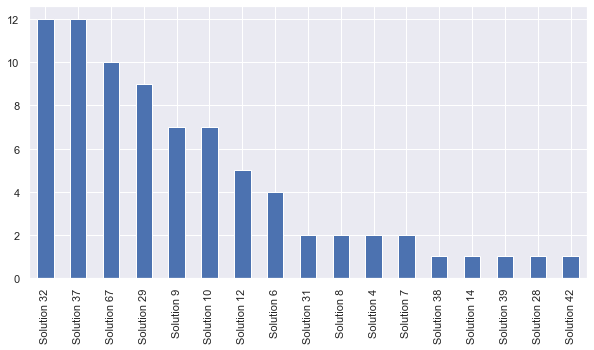

In [15]:
dup['Solution Type'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

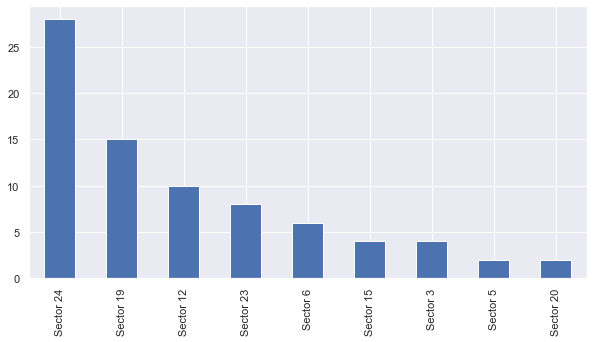

In [16]:
dup['Sector'].value_counts().plot.bar(figsize=(10,5))

In [17]:
dup["Location"].value_counts() 
#only location L10 have all the missing values

L10    79
Name: Location, dtype: int64

<AxesSubplot:>

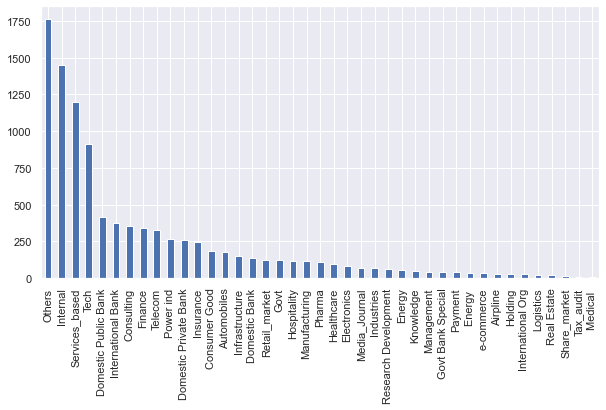

In [18]:
#Visualizing client category to identify most occuring type
df['Client Category'].value_counts().plot.bar(figsize=(10,5))

In [19]:
#replacing value with Others
df["Client Category"] = df["Client Category"].fillna("Others")       

In [20]:
df['Client Category'].isnull().mean()

0.0

### Deal Cost 0 Value and Outliers treatment                   

In [21]:
#looking for o deal cost
dl = df.loc[ (df["Deal Cost"]==0.0)]
dl

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
79,Govt,Solution 37,2011-11-20,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
95,Others,Solution 31,2011-11-07,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
139,Govt,Solution 37,2012-02-06,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
150,Others,Solution 31,2012-03-23,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
210,Domestic Public Bank,Solution 59,2012-06-12,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,Lost
...,...,...,...,...,...,...,...,...,...
7886,Retail_market,Solution 9,2014-11-24,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost
7903,Tech,Solution 9,2015-05-31,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7907,Tech,Solution 9,2014-12-21,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7921,Retail_market,Solution 9,2014-12-21,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost


<AxesSubplot:>

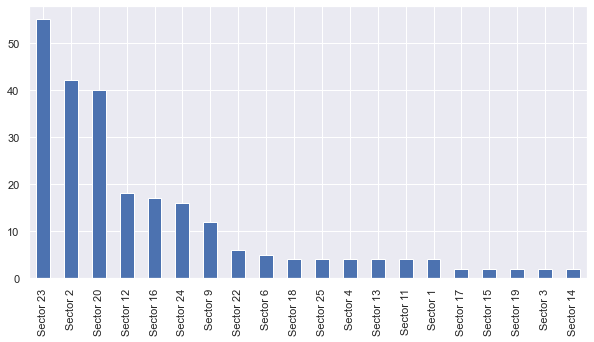

In [22]:
dl['Sector'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

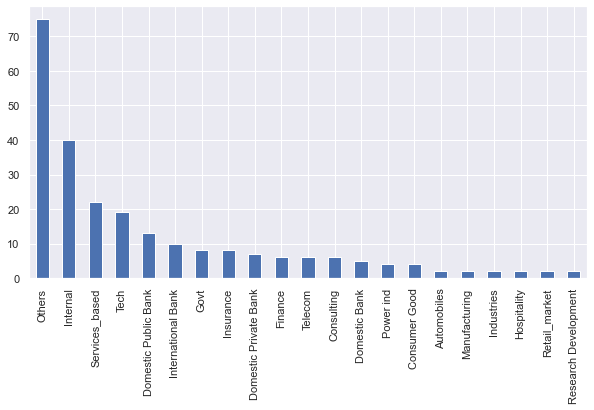

In [23]:
dl['Client Category'].value_counts().plot.bar(figsize=(10,5))

In [24]:
#Finding median value of ;low cost deals
df['Deal Cost'].median()

382352.94

In [25]:
#Adding median value in dataframe
df["Deal Cost"]=np.where((df["Deal Cost"]==0.0), 382352.94, df["Deal Cost"])

In [26]:
#checking if 0.0 values replaced in data
df[(df['Deal Cost']==0.0)]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code


In [27]:
#Statistical Summery of numeric values
df.describe(percentiles=[0.01, 0.02, 0.03, 0.05, 0.1, 0.25, 0.50, 0.75, 0.95, 0.96,0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,25%,50%,75%,95%,96%,97%,98%,99%,max
Deal Cost,10047.0,776620.150438,1.617537e+06,294.12,1470.59,14705.88,38458.8212,65352.941,110294.12,205882.35,382352.94,764705.88,2558823.53,2882352.94,3258529.41,4.442176e+06,6.829506e+06,36764705.88


<AxesSubplot:xlabel='Deal Cost', ylabel='Density'>

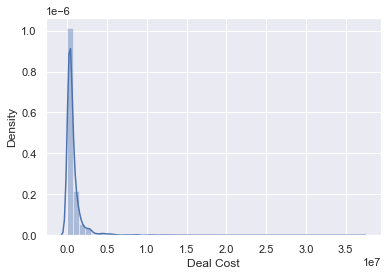

In [28]:
#data distribution of deal cost
sns.distplot(df['Deal Cost'])

<AxesSubplot:xlabel='Deal Cost'>

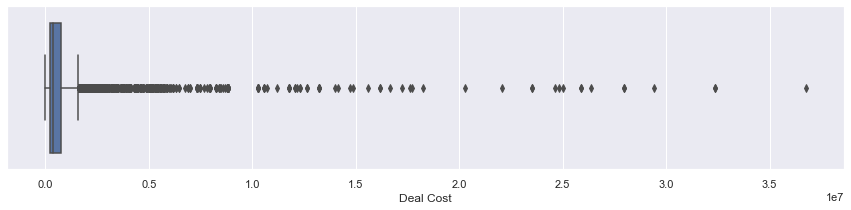

In [29]:
fig, ax = plt.subplots(figsize = (15,3))
sns.boxplot(x = 'Deal Cost', data = df, showfliers = True)

In [30]:
Q1=205882.35    
Q3= 764705.88
QIR= Q3-Q1
QIR

558823.53

In [31]:
print ("lower fence" ,Q1-(1.5*(QIR)))

lower fence -632352.9450000001


In [32]:
print ("upper fence" ,Q3+(1.5*(QIR)))

upper fence 1602941.175


In [33]:
df["Deal Cost"][df["Deal Cost"]>=1602941.175] =1602941.175

<AxesSubplot:xlabel='Deal Cost'>

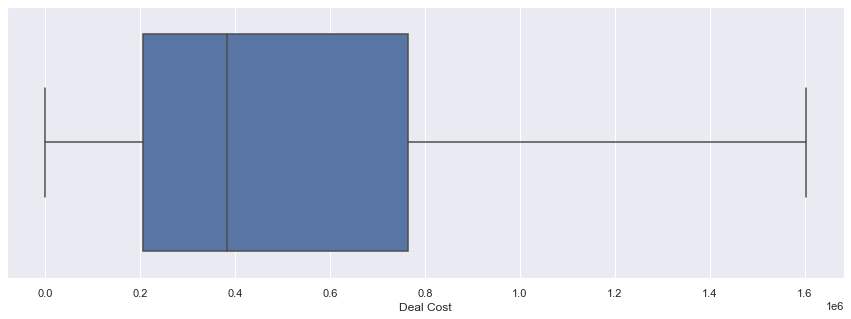

In [34]:
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(x = 'Deal Cost', data = df, showfliers = True)

In [35]:
df.astype('object').describe().T

,count,unique,top,freq
Client Category,10047,41,Others,1841
Solution Type,10047,67,Solution 32,1437
Deal Date,10047,2555,2018-07-27 00:00:00,15
Sector,10047,25,Sector 23,2690
Location,10047,13,L10,3355
VP Name,10047,43,Mervin Harwood,1163
Manager Name,10047,278,Molly Eakes,323
Deal Cost,10047.0,1165.0,1602941.175,933.0
Deal Status Code,10047,2,Lost,6292


# Starting Exploratory Data Analysis

Univariate Analysis

* Unique count of Target Variable

In [36]:
df['Deal Status Code'].value_counts()

Lost    6292
Won     3755
Name: Deal Status Code, dtype: int64

*Client Category Visualization

<AxesSubplot:xlabel='count', ylabel='Client Category'>

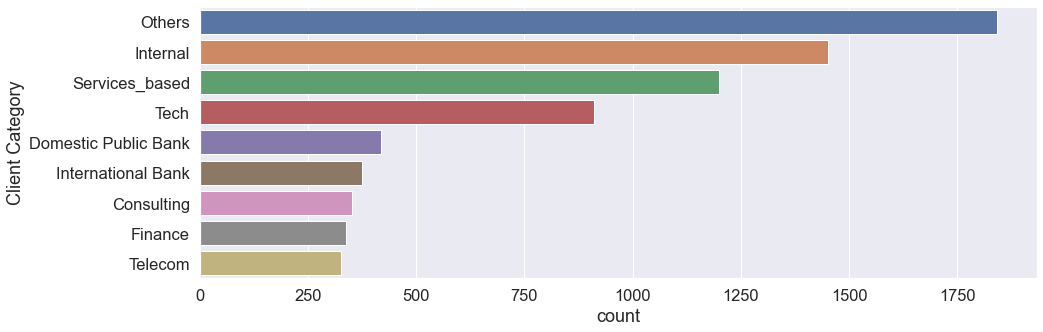

In [37]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="Client Category", data=df ,
              order=df['Client Category'].value_counts().iloc[0:9].index)

*Solution Type

<AxesSubplot:xlabel='count', ylabel='Solution Type'>

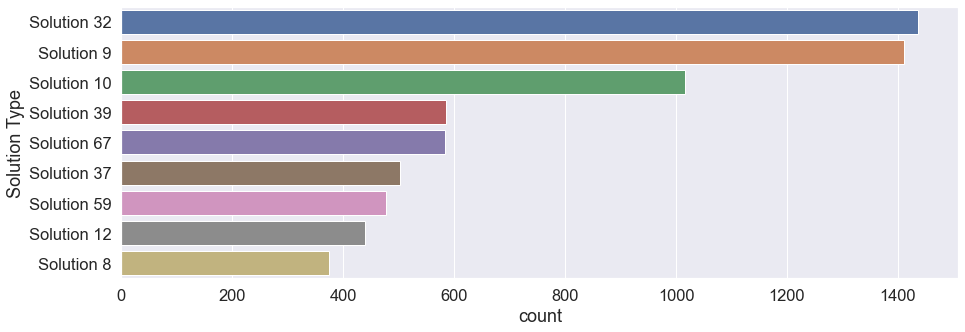

In [38]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="Solution Type", data=df,
              order=df['Solution Type'].value_counts().iloc[0:9].index)

*Sector

<AxesSubplot:xlabel='count', ylabel='Sector'>

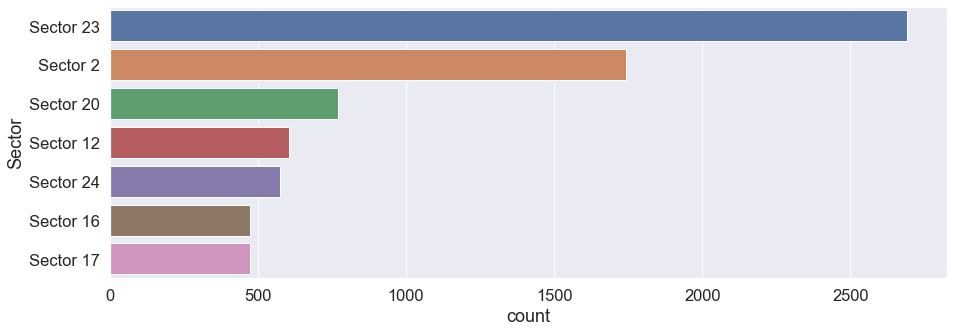

In [39]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="Sector", data=df,
              order=df['Sector'].value_counts().iloc[0:7].index)

*Location

<AxesSubplot:xlabel='count', ylabel='Location'>

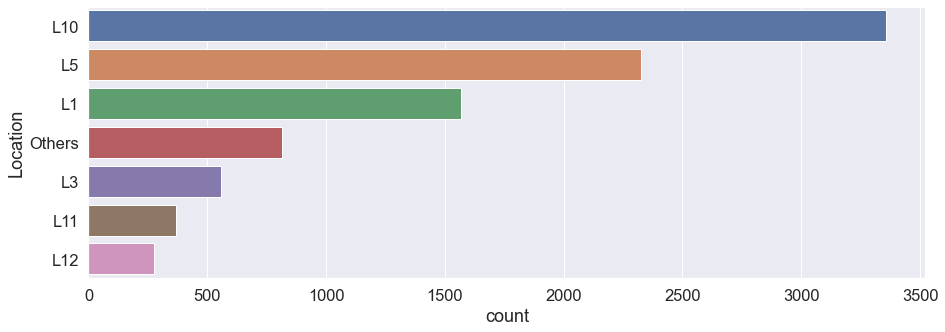

In [40]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="Location", data=df,
              order=df['Location'].value_counts().iloc[0:7].index)

*VP Name

<AxesSubplot:xlabel='count', ylabel='VP Name'>

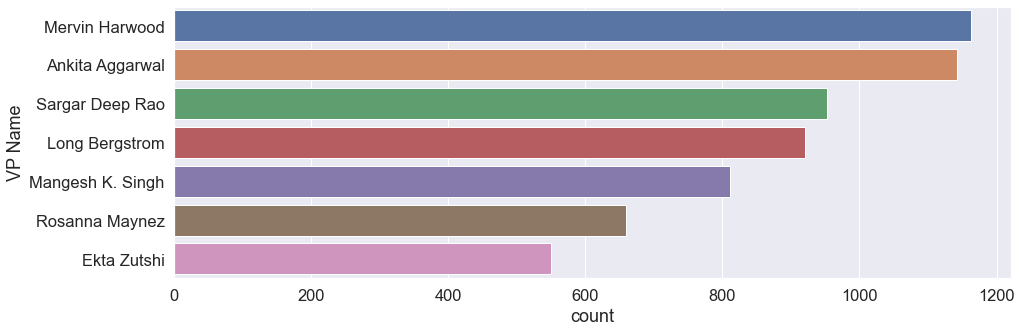

In [41]:
sns.set(font_scale=1.5)
fig = plt.figure(figsize = (15,5))
sns.countplot(y="VP Name", data=df,
              order=df['VP Name'].value_counts().iloc[0:7].index)

*Distribution of Deal Cost

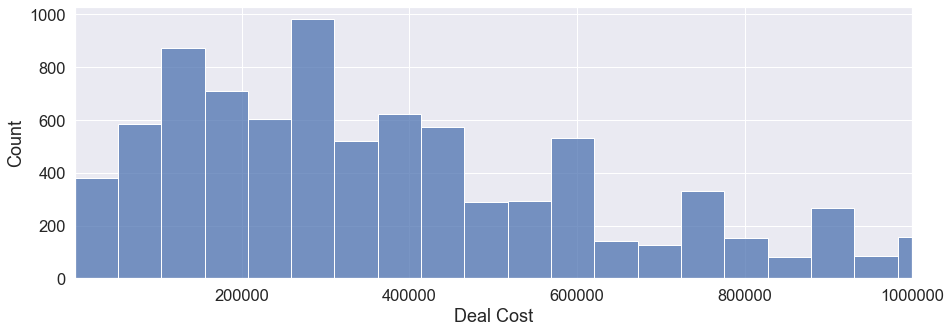

In [42]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(x='Deal Cost',data=df, ax=ax)
ax.set_xlim(1000,1000000)
ax.ticklabel_format(style='plain', axis='x')
plt.show()

#### Bivariate Analysis with Deal Cost

*VP Name

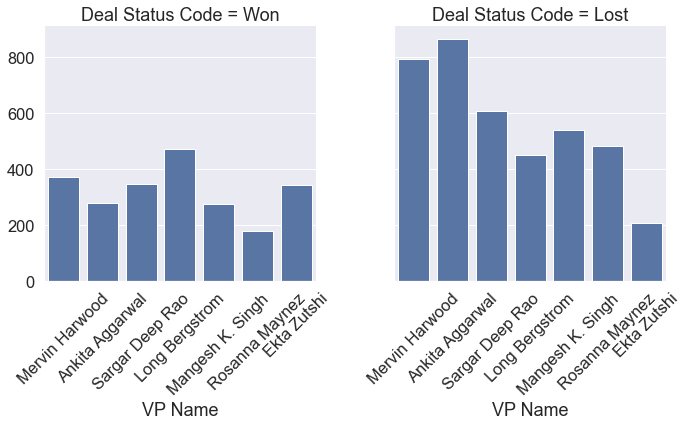

In [43]:
g = sns.FacetGrid(df,col="Deal Status Code",height=5)
g.map(sns.countplot, 'VP Name',order = df['VP Name'].value_counts().iloc[0:7].index)
g.set_xticklabels(rotation=45) 
plt.show()

* Client Category

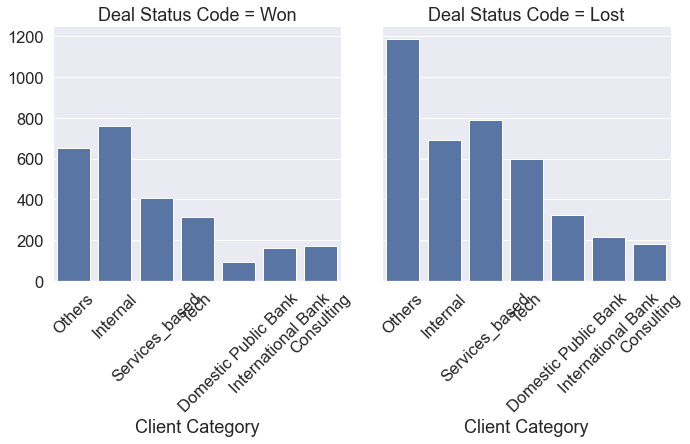

In [44]:
g = sns.FacetGrid(df,col="Deal Status Code",height=5)
g.map(sns.countplot, 'Client Category',order = df['Client Category'].value_counts().iloc[0:7].index)
g.set_xticklabels(rotation=45) 
plt.show()

* Manager Name

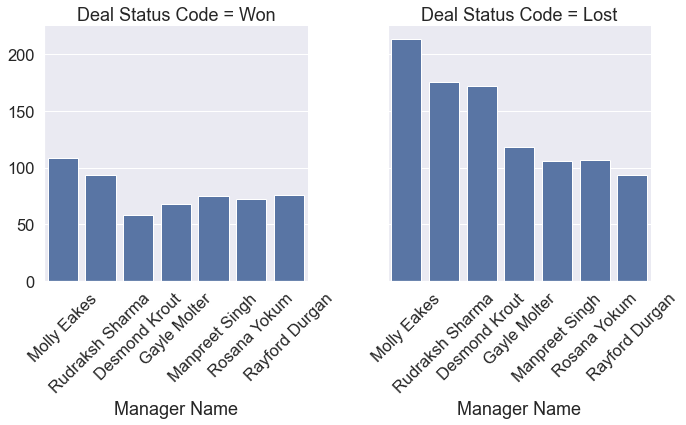

In [45]:
g = sns.FacetGrid(df,col="Deal Status Code",height=5)
g.map(sns.countplot, 'Manager Name',order = df['Manager Name'].value_counts().iloc[0:7].index)
g.set_xticklabels(rotation=45) 
plt.show()

* Distribution of Deal Cost with Deal Status

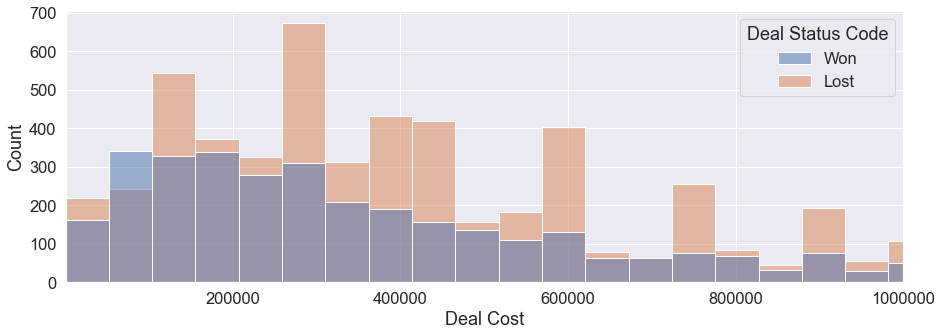

In [46]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(x='Deal Cost',hue = 'Deal Status Code',data=df, ax=ax,fill=True)
ax.set_xlim(1000,1000000)
ax.ticklabel_format(style='plain', axis='x')
plt.show()


<AxesSubplot:xlabel='Deal Status Code', ylabel='Deal Cost'>

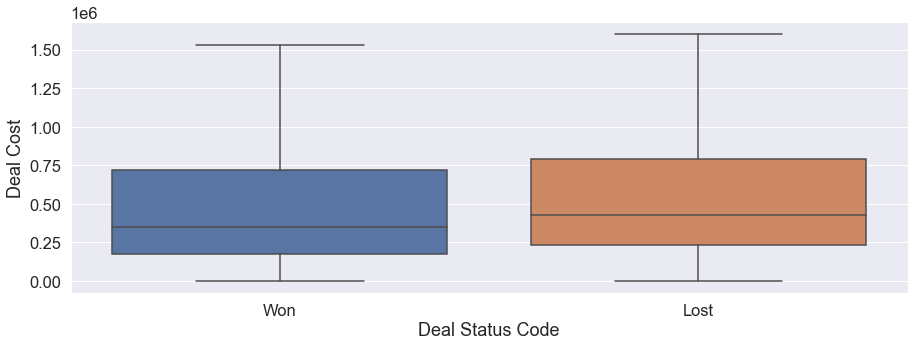

In [47]:
fig, ax = plt.subplots(figsize = (15,5))
sns.boxplot(y = 'Deal Cost',x='Deal Status Code', data = df, showfliers = False)

In [48]:
df.nunique()

Client Category       41
Solution Type         67
Deal Date           2555
Sector                25
Location              13
VP Name               43
Manager Name         278
Deal Cost           1165
Deal Status Code       2
dtype: int64

In [49]:
# Get deal status count-Lost & Won
df['Deal Status Code'].value_counts()

Lost    6292
Won     3755
Name: Deal Status Code, dtype: int64

In [50]:
def without_hue (plot, feature):
    total=len(feature)
    for p in plot.patches:
        percentage='{:.0f}%'.format(100* p.get_height()/total)
        x=p.get_x()+p.get_width()/2-0.05
        y=p.get_y()+p.get_height()
        ax.annotate(percentage,(x,y),size=12)
    plt.show()

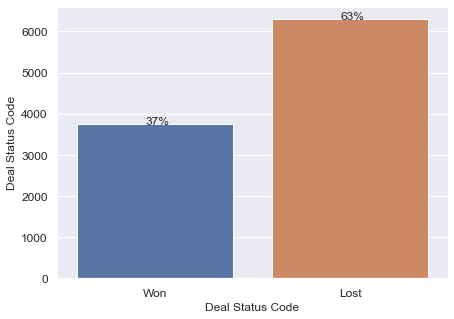

In [51]:
plt.figure(figsize=(7,5))
ax=sns.countplot('Deal Status Code',data=df)
plt.xticks(size=12)
plt.xlabel('Deal Status Code',size=12)
plt.yticks(size=12)
plt.ylabel('Deal Status Code',size=12)

without_hue(ax, df['Deal Status Code'])

In [52]:
df

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.000,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.880,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.350,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.820,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,1602941.175,Won


In [53]:
#Counts of each column
df["Client Category"].value_counts()

Others                   1841
Internal                 1451
Services_based           1200
Tech                      911
Domestic Public Bank      418
International Bank        375
Consulting                352
Finance                   339
Telecom                   326
Power ind                 264
Domestic Private Bank     261
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            151
Domestic Bank             134
Retail_market             126
Govt                      120
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [54]:
#Win%age of Client Category column
Win_Ratio=pd.crosstab(df['Client Category'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Client Category,,,,
Share_market,4,10,14,71.428571
Internal,691,760,1451,52.377671
Management,22,21,43,48.837209
Consulting,182,170,352,48.295455
Consumer Good,98,87,185,47.027027
Holding,14,11,25,44.000000
Energy,32,25,57,43.859649
International Bank,215,160,375,42.666667
Power ind,152,112,264,42.424242


In [55]:
df["Solution Type"].value_counts()

Solution 32    1437
Solution 9     1411
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 60       1
Solution 64       1
Solution 57       1
Solution 18       1
Solution 19       1
Name: Solution Type, Length: 67, dtype: int64

In [56]:
# Win ratio of solution type
Win_Ratio=pd.crosstab(df['Solution Type'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Solution Type,,,,
Solution 24,0,5,5,100.000000
Solution 19,0,1,1,100.000000
Solution 66,0,1,1,100.000000
Solution 64,0,1,1,100.000000
Solution 60,0,1,1,100.000000
Solution 57,0,1,1,100.000000
Solution 56,0,1,1,100.000000
Solution 18,0,1,1,100.000000
Solution 30,12,62,74,83.783784


In [57]:
df["Sector"].value_counts()

Sector 23    2690
Sector 2     1743
Sector 20     771
Sector 12     607
Sector 24     576
Sector 16     474
Sector 17     473
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      127
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

In [58]:
# Win ration acc to sectors
Win_Ratio=pd.crosstab(df['Sector'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Sector,,,,
Sector 21,10,20,30,66.666667
Sector 7,6,8,14,57.142857
Sector 20,382,389,771,50.453956
Sector 9,202,167,369,45.257453
Sector 17,273,200,473,42.283298
Sector 19,84,58,142,40.845070
Sector 15,234,153,387,39.534884
Sector 23,1637,1053,2690,39.144981
Sector 24,358,218,576,37.847222


In [59]:
df["Location"].value_counts()

L10       3355
L5        2327
L1        1570
Others     814
L3         556
L11        367
L12        276
L9         239
L7         237
L4         187
L6         100
L8          11
L2           8
Name: Location, dtype: int64

In [60]:
# Win ratio acc to LOcation
Win_Ratio=pd.crosstab(df['Location'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False)

Deal Status Code,Lost,Won,Total,Win%
Location,,,,
Others,423,391,814,48.034398
L1,910,660,1570,42.038217
L5,1391,936,2327,40.223464
L11,232,135,367,36.784741
L3,356,200,556,35.971223
L12,178,98,276,35.507246
L10,2225,1130,3355,33.681073
L4,125,62,187,33.155080
L6,70,30,100,30.000000


In [61]:
df["VP Name"].value_counts()

Mervin Harwood         1163
Ankita Aggarwal        1142
Sargar Deep Rao         953
Long Bergstrom          920
Mangesh K. Singh        811
Rosanna Maynez          659
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          207
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Alam Syed               126
Molly Eakes             125
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Rahul Kocher             32
Marcella Mo              32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [62]:
# Win ratio acc to VP
Win_Ratio=pd.crosstab(df['VP Name'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
VP Name,,,,
Ekta Zutshi,206,344,550,62.545455
Prashant Rawat,12,15,27,55.555556
Vikram Rawat,8,9,17,52.941176
Long Bergstrom,449,471,920,51.195652
Alam Syed,62,64,126,50.793651
Molly Eakes,65,60,125,48.000000
Lilli Storrs,14,12,26,46.153846
neeraj kumar,254,217,471,46.072187
Man Suddeth,16,13,29,44.827586


In [63]:
df["Manager Name"].value_counts()

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Anju Nanda           1
Palmer Holmberg      1
Taran Singh          1
Heath Mullarkey      1
Natalia Dumlao       1
Name: Manager Name, Length: 278, dtype: int64

In [64]:
# Win ratio acc to Manager_Name
Win_Ratio=pd.crosstab(df['Manager Name'],df['Deal Status Code'])
Win_Ratio['Total']=(Win_Ratio['Won']+Win_Ratio['Lost'])
Win_Ratio['Win%']=(Win_Ratio['Won']*100)/(Win_Ratio['Total'])
Win_Ratio.sort_values(by=['Win%'],ascending=False).head(10)

Deal Status Code,Lost,Won,Total,Win%
Manager Name,,,,
Aastha Gandhi,0,1,1,100.0
Anish Jonson,0,1,1,100.0
Vaibhav Somaskandan,0,2,2,100.0
Uzaar Ali,0,1,1,100.0
Upendra Bhatt,0,5,5,100.0
Taran Singh,0,1,1,100.0
Sumita Verma,0,2,2,100.0
Sumit Arora,0,1,1,100.0
Sultan Khan,0,1,1,100.0


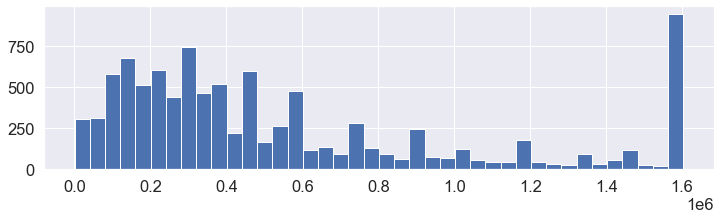

In [65]:
# This plot representing most of deals are below $0.5M
df['Deal Cost'].hist(bins=40,figsize=(12,3));

In [66]:
df["Deal Cost"].value_counts()

1602941.175    933
294117.650     506
588235.290     388
441176.470     377
147058.820     362
              ... 
442647.060       1
404705.880       1
91764.710        1
84411.770        1
223823.530       1
Name: Deal Cost, Length: 1165, dtype: int64

In [67]:
#Min deal dt
df['Deal Date'].min()

Timestamp('2011-04-19 00:00:00')

In [68]:
#Max deal date
df['Deal Date'].max()

Timestamp('2019-06-07 00:00:00')

In [69]:
# Adding Year and month column
from datetime import datetime
#data['Month Year']=data['Deal Date'].apply(lambda x: x.strftime('%Y-%m'))
df['Deal Year'] = pd.DatetimeIndex(df['Deal Date']).year
df['Deal Month'] = pd.DatetimeIndex(df['Deal Date']).month
df

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.000,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.880,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.350,Lost,2011,6
...,...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost,2019,3
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.820,Won,2019,3
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost,2019,2
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,1602941.175,Won,2019,1


In [70]:
def without_hue (plot, feature):
    total=len(feature)
    for p in plot.patches:
        percentage='{:.0f}%'.format(100* p.get_height()/total)
        x=p.get_x()+p.get_width()/2-0.05
        y=p.get_y()+p.get_height()
        ax.annotate(percentage,(x,y),size=12)
    plt.show()

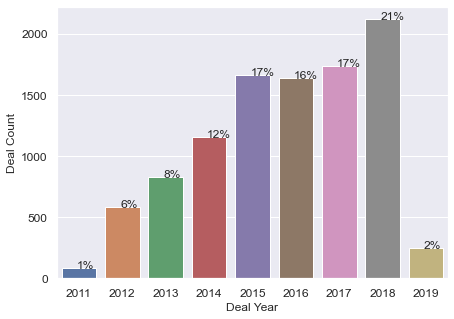

In [71]:
plt.figure(figsize=(7,5))
ax=sns.countplot('Deal Year',data=df)
plt.xticks(size=12)
plt.xlabel('Deal Year',size=12)
plt.yticks(size=12)
plt.ylabel('Deal Count',size=12)

without_hue(ax, df['Deal Year'])

<AxesSubplot:>

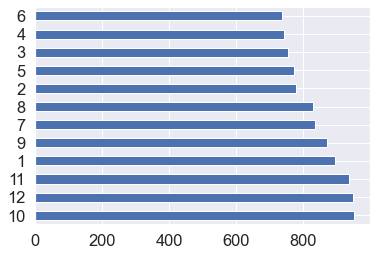

In [72]:
# Waterfall acc to Monthly sales
df['Deal Month'].value_counts()[:20].plot(kind='barh')

In [73]:
df.groupby(['Deal Year','Deal Month'])['Deal Cost'].sum()

Deal Year  Deal Month
2011       4             6.923529e+05
           5             8.088235e+04
           6             8.088235e+04
           7             6.323529e+05
           8             6.000000e+04
                             ...     
2019       2             2.854647e+07
           3             3.213235e+07
           4             9.582059e+06
           5             5.340294e+06
           6             5.588235e+05
Name: Deal Cost, Length: 98, dtype: float64

In [74]:
pd.crosstab(df['Deal Year'],df['Deal Status Code'])

Deal Status Code,Lost,Won
Deal Year,,
2011,44,41
2012,319,262
2013,465,363
2014,755,402
2015,1149,514
2016,1065,570
2017,1088,649
2018,1274,843
2019,133,111


In [75]:
def barPerc(df,xVar,ax):
    numX=len([x for x in df[xVar].unique() if x==x])
    bars=ax.patches
    for ind in range(numX):
        hueBars=bars[ind:][::numX]
        total=sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,bar.get_height(),f'{bar.get_height()/total:.0%}',ha="center",va="bottom")
        

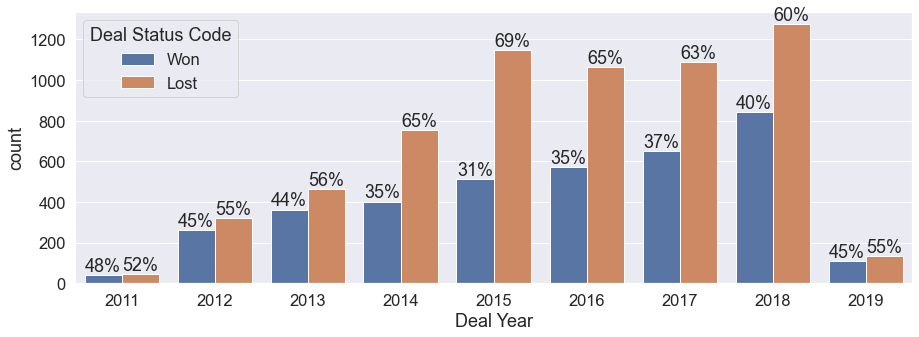

In [76]:
plt.figure(figsize=[15,5])
ax=sns.countplot(x='Deal Year',hue='Deal Status Code',data=df)
barPerc(df,'Deal Year',ax)

In [77]:
pd.crosstab(df['Deal Month'],df['Deal Status Code'])

Deal Status Code,Lost,Won
Deal Month,,
1,555,340
2,499,279
3,464,289
4,486,257
5,443,330
6,461,276
7,530,305
8,499,328
9,545,326


<AxesSubplot:>

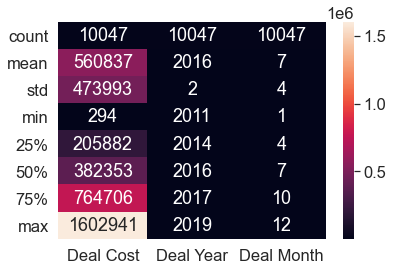

In [78]:
# Visuals of stats of whole dataset
sns.heatmap(df.describe(), annot = True, fmt = '0.0f')

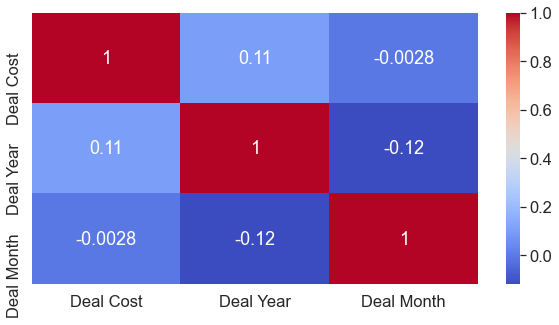

In [79]:
corr_matrix = df.corr() 

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

#### Identifying Top 5 Bid Manager-SBU Head Combination

In [80]:
#Copy of original dataset
df1=df.copy()
df1.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


In [81]:
df1.drop('Deal Date',axis=1,inplace=True)

In [82]:
df2=df1.copy()
df2.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


In [83]:
#Combining VP name and Manager Name to create new feature named as "VP_Manager"
df2['VP Manager']=df2['VP Name']+" "+ df2['Manager Name']
df2

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.000,Won,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.880,Won,2012,9,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost,2011,8,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.000,Lost,2011,4,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.350,Lost,2011,6,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost,2019,3,Rudraksh Sharma Rudraksh Sharma
10057,Internal,Solution 6,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.820,Won,2019,3,Rudraksh Sharma Sharavan Singh
10058,Power ind,Solution 9,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.290,Lost,2019,2,Rudraksh Sharma Rudraksh Sharma
10059,Power ind,Solution 62,Sector 9,L5,Man Suddeth,Cleotilde Biron,1602941.175,Won,2019,1,Man Suddeth Cleotilde Biron


In [84]:
#Dropping unrelevant cols
df2.drop('VP Name',axis=1,inplace=True)
df2.drop('Manager Name',axis=1,inplace=True)

In [85]:
#Final dataset
df2.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,Won,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,Won,2012,9,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,60000.00,Lost,2011,8,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,60000.00,Lost,2011,4,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,80882.35,Lost,2011,6,Ekta Zutshi Russell Dahlen


In [86]:
#Calculating frequency of each VP_Manager
new_df=pd.DataFrame({'VP Manager':df2['VP Manager'].value_counts().index,'Total Deals':df2['VP Manager'].value_counts().values})
new_df

,VP Manager,Total Deals
0,Ankita Aggarwal Desmond Krout,213
1,Rahul Bajpai Rudraksh Sharma,198
2,neeraj kumar Molly Eakes,144
3,Long Bergstrom Jewell Tunstall,126
4,Sargar Deep Rao Manpreet Singh,122
...,...,...
955,som dutt Cori Gillispie,1
956,Gaurav Sameria sunder paal,1
957,Sargar Deep Rao Sarwan Singh,1
958,Saurabh Singh kailash kumar,1


In [87]:
Won_data=df2.loc[df1['Deal Status Code']=='Won']
Won_data.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,Won,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,Won,2012,9,Ekta Zutshi Gopa Trilochana
6,Internal,Solution 59,Sector 2,L10,526176.47,Won,2011,11,Mervin Harwood rahul sharma
8,Consumer Good,Solution 42,Sector 12,L10,1032352.94,Won,2012,4,Lilli Storrs Md. Daud
10,International Bank,Solution 6,Sector 2,L10,316176.47,Won,2012,2,Long Bergstrom Luv Malhotra


In [88]:
# Calculating won deals frequency 
won_win=pd.DataFrame({'VP Manager':Won_data['VP Manager'].value_counts().index,'won deals':Won_data['VP Manager'].value_counts().values})
won_win

,VP Manager,won deals
0,Long Bergstrom Russell Dahlen,75
1,Rahul Bajpai Rudraksh Sharma,72
2,neeraj kumar Molly Eakes,62
3,Ankita Aggarwal Desmond Krout,53
4,neeraj kumar Vinay Kumar,51
...,...,...
701,Rahul Bajpai Akshansh Chaudhary,1
702,Molly Eakes gurmit singh,1
703,Hardeep Suksma vinit katariya,1
704,Long Bergstrom Sumita Verma,1


In [89]:
#Adding deatils in Copied New Dataset i.e new_df
new_df['won deals']=np.NaN
i=0
j=0

In [90]:
for i in range(won_win.shape[0]):
    for j in range(new_df.shape[0]):
        if won_win['VP Manager'].loc[i]==new_df['VP Manager'].loc[j]:
            new_df['won deals'].loc[j]=won_win['won deals'].loc[i]

In [91]:
new_df['won deals']=new_df['won deals'].replace(np.NaN,0)

In [92]:
new_df['%Win']=np.NaN
k=0

In [93]:
#Calculating Win percentage of each pair
for k in range(new_df.shape[0]):
    new_df['%Win'].loc[k]=((new_df['won deals'].loc[k]/new_df['Total Deals'].loc[k])*100)

In [94]:
new_df.head()

,VP Manager,Total Deals,won deals,%Win
0,Ankita Aggarwal Desmond Krout,213,53.0,24.882629
1,Rahul Bajpai Rudraksh Sharma,198,72.0,36.363636
2,neeraj kumar Molly Eakes,144,62.0,43.055556
3,Long Bergstrom Jewell Tunstall,126,46.0,36.507937
4,Sargar Deep Rao Manpreet Singh,122,42.0,34.426230


In [95]:
# top 5 performers but not correct
new_df=new_df.sort_values('%Win',ascending=False)
new_df.head()

,VP Manager,Total Deals,won deals,%Win
959,Gopa Trilochana sunder paal,1,1.0,100.0
859,Rosanna Maynez Subhangi Sood,1,1.0,100.0
842,Ekta Zutshi Akshay Gosh,1,1.0,100.0
843,Ankita Aggarwal Vinay Kumar,1,1.0,100.0
359,Earline Langton Sanchita Pant,6,6.0,100.0


In [96]:
#% contribution of each pair
new_df['%Contribution']=(new_df['won deals'])/(new_df['won deals'].sum())

In [97]:
#Accuracy
new_df['Accuracy']=(new_df['%Win'])*(new_df['%Contribution'])
new_df

,VP Manager,Total Deals,won deals,%Win,%Contribution,Accuracy
959,Gopa Trilochana sunder paal,1,1.0,100.0,0.000266,0.026631
859,Rosanna Maynez Subhangi Sood,1,1.0,100.0,0.000266,0.026631
842,Ekta Zutshi Akshay Gosh,1,1.0,100.0,0.000266,0.026631
843,Ankita Aggarwal Vinay Kumar,1,1.0,100.0,0.000266,0.026631
359,Earline Langton Sanchita Pant,6,6.0,100.0,0.001598,0.159787
...,...,...,...,...,...,...
710,Ekta Zutshi Lino Batterton,2,0.0,0.0,0.000000,0.000000
709,neeraj kumar Kittie Selvey,2,0.0,0.0,0.000000,0.000000
708,Dennis Faux Russ Vaz,2,0.0,0.0,0.000000,0.000000
707,Ankita Aggarwal kailash kumar,2,0.0,0.0,0.000000,0.000000


In [98]:
# Top 5 best recommended combinations
new_df=new_df.sort_values('Accuracy',ascending=False)
new_df.head()

,VP Manager,Total Deals,won deals,%Win,%Contribution,Accuracy
7,Long Bergstrom Russell Dahlen,105,75.0,71.428571,0.019973,1.426669
47,Ekta Zutshi neeraj kumar,46,40.0,86.956522,0.010652,0.926301
16,neeraj kumar Vinay Kumar,75,51.0,68.000000,0.013582,0.923569
2,neeraj kumar Molly Eakes,144,62.0,43.055556,0.016511,0.710904
1,Rahul Bajpai Rudraksh Sharma,198,72.0,36.363636,0.019174,0.697252


### Feature Engineering

In [99]:
df2

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,150000.000,Won,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.880,Won,2012,9,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,60000.000,Lost,2011,8,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,60000.000,Lost,2011,4,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,80882.350,Lost,2011,6,Ekta Zutshi Russell Dahlen
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,588235.290,Lost,2019,3,Rudraksh Sharma Rudraksh Sharma
10057,Internal,Solution 6,Sector 20,Others,777058.820,Won,2019,3,Rudraksh Sharma Sharavan Singh
10058,Power ind,Solution 9,Sector 9,L5,588235.290,Lost,2019,2,Rudraksh Sharma Rudraksh Sharma
10059,Power ind,Solution 62,Sector 9,L5,1602941.175,Won,2019,1,Man Suddeth Cleotilde Biron


In [100]:
df2["Deal Status Code"]=np.where(df2["Deal Status Code"]=="Won", 1, 0)
df2.head()

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,Telecom,Solution 7,Sector 24,L5,150000.00,1,2012,3,Ekta Zutshi Gopa Trilochana
1,Telecom,Solution 7,Sector 24,L5,744705.88,1,2012,9,Ekta Zutshi Gopa Trilochana
2,Internal,Solution 59,Sector 20,Others,60000.00,0,2011,8,Ekta Zutshi Russell Dahlen
3,Internal,Solution 59,Sector 20,Others,60000.00,0,2011,4,Ekta Zutshi Russell Dahlen
4,Internal,Solution 32,Sector 20,Others,80882.35,0,2011,6,Ekta Zutshi Russell Dahlen


In [101]:

col=['Client Category','Solution Type','Sector','Location','VP Manager']

In [102]:
for feature in col:
    ordinal_labels_1=df2.groupby(feature)['Deal Status Code'].mean().sort_values().index
    ordinal_labels_2={k:i for i,k in enumerate(ordinal_labels_1,0)}
    df2[feature]=df2[feature].map(ordinal_labels_2)

In [103]:
df2.head(10)

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,29,35,16,10,150000.00,1,2012,3,609
1,29,35,16,10,744705.88,1,2012,9,609
2,39,31,22,12,60000.00,0,2011,8,247
3,39,31,22,12,60000.00,0,2011,4,247
4,39,53,22,12,80882.35,0,2011,6,247
5,39,53,22,12,80882.35,0,2011,5,247
6,39,31,12,6,526176.47,1,2011,11,913
7,16,35,1,10,409705.88,0,2012,9,397
8,36,41,8,6,1032352.94,1,2012,4,929
9,39,31,22,12,558823.53,0,2011,11,133


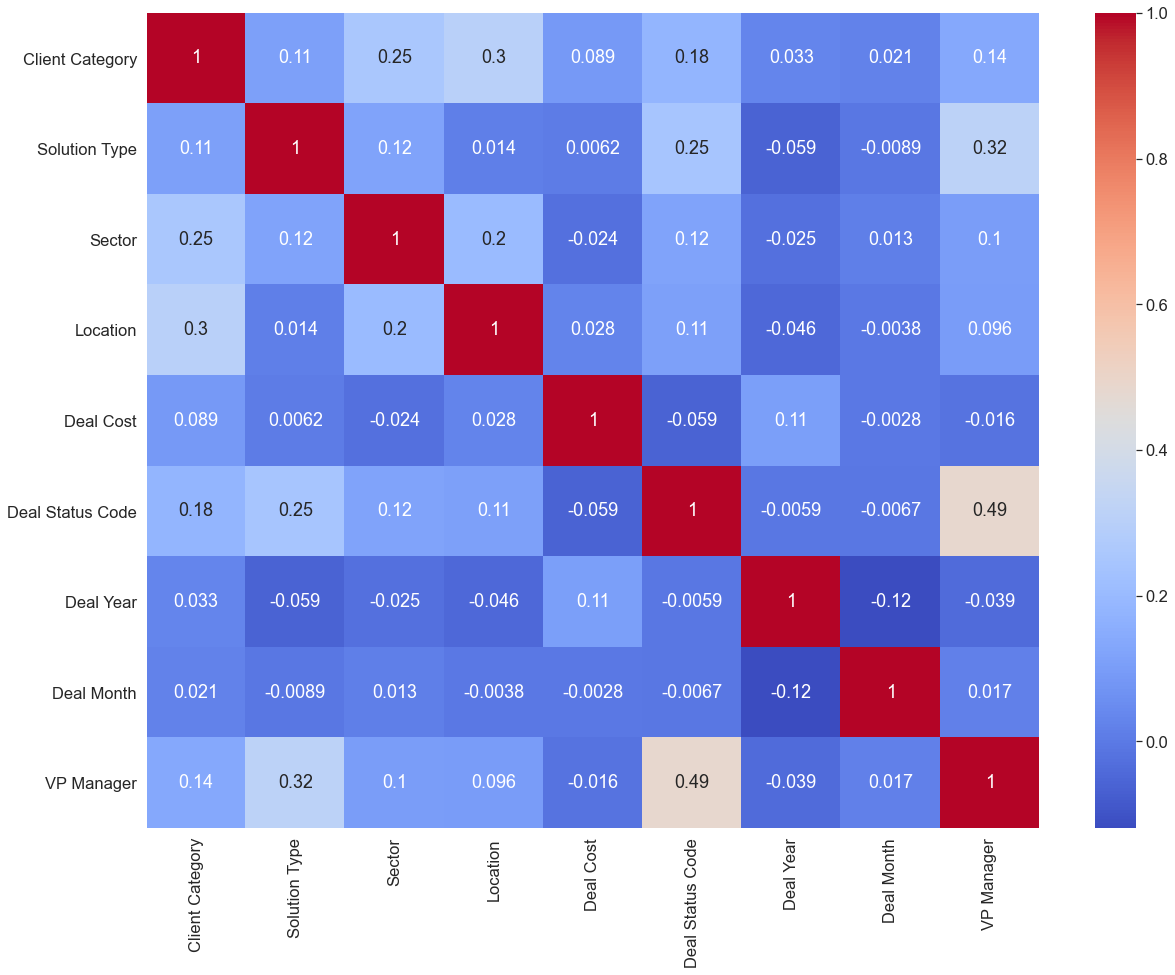

In [104]:
corr_matrix = df2.corr() 

#plot correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

In [105]:
#removing columns with less importance

In [106]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

df3 = pd.DataFrame(scale.fit_transform(df2.values), columns=df2.columns, index=df2.index)

In [107]:
df3

,Client Category,Solution Type,Sector,Location,Deal Cost,Deal Status Code,Deal Year,Deal Month,VP Manager
0,0.725,0.530303,0.666667,0.833333,0.093412,1.0,0.125,0.181818,0.635036
1,0.725,0.530303,0.666667,0.833333,0.464489,1.0,0.125,0.727273,0.635036
2,0.975,0.469697,0.916667,1.000000,0.037255,0.0,0.000,0.636364,0.257560
3,0.975,0.469697,0.916667,1.000000,0.037255,0.0,0.000,0.272727,0.257560
4,0.975,0.803030,0.916667,1.000000,0.050284,0.0,0.000,0.454545,0.257560
...,...,...,...,...,...,...,...,...,...
10056,0.800,0.348485,0.875000,0.833333,0.366856,0.0,1.000,0.181818,0.111575
10057,0.975,0.409091,0.916667,1.000000,0.484676,1.0,1.000,0.181818,0.647550
10058,0.800,0.348485,0.875000,0.833333,0.366856,0.0,1.000,0.090909,0.111575
10059,0.800,0.696970,0.875000,0.833333,1.000000,1.0,1.000,0.000000,0.990615


In [108]:
#Splitting Dependent and Independent variable

X=df3.drop('Deal Status Code',axis=1)  #Independent Variable
y=df3['Deal Status Code'] # Dependent Variable

In [109]:
from sklearn import preprocessing 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn import metrics

In [110]:
#Train-Test Split 20:80 ratio
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=99)

In [111]:
y_train.value_counts(normalize=True)

0.0    0.623616
1.0    0.376384
Name: Deal Status Code, dtype: float64

In [112]:
y_test.value_counts(normalize=True)

0.0    0.636816
1.0    0.363184
Name: Deal Status Code, dtype: float64

In [113]:
X_train.shape , y_train.shape

((8037, 8), (8037,))

In [114]:
X_test.shape , y_test.shape

((2010, 8), (2010,))

In [115]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.01745062, 0.02265489, 0.00252877, 0.00309837, 0.0837525 ,
       0.        , 0.00201021, 0.12201725])

In [116]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

VP Manager         0.122017
Deal Cost          0.083752
Solution Type      0.022655
Client Category    0.017451
Location           0.003098
Sector             0.002529
Deal Month         0.002010
Deal Year          0.000000
dtype: float64

<AxesSubplot:>

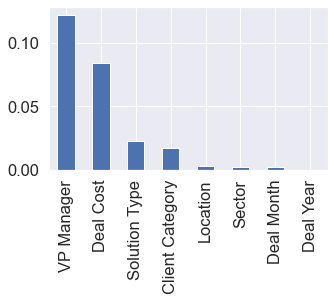

In [117]:
0.125153
# Identifying the imp features
mutual_info.sort_values(ascending=False).plot.bar(figsize=(5,3))

## Model Creation

#### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [119]:
logmodel=LogisticRegression()

In [120]:
#Hyperparameter Optimization-tuning

from sklearn.model_selection import RandomizedSearchCV

params={'penalty':['l1','l2'], 'C':np.logspace(-4,4,20),'solver':['liblinear','sag','saga']}

In [121]:
log_randomcv=RandomizedSearchCV(logmodel,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [122]:
log_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   scoring='roc_auc', verbose=3)

In [123]:
# Identifying best estimator
lg_model=log_randomcv.best_estimator_
lg_model

LogisticRegression(C=1438.44988828766, penalty='l1', solver='liblinear')

In [124]:
print("Train score ", lg_model.score(X_train, y_train))
print("Test Score", lg_model.score(X_test, y_test))

Train score  0.7410725395047904
Test Score 0.746268656716418


In [125]:
#predict:predict class labels for samples in X
lg_model.predict(X_train)
y_pred=lg_model.predict(X_train)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [126]:
#predict probab estimates
pred_proba=lg_model.predict_proba(X_train)
pred_proba

array([[0.52365674, 0.47634326],
       [0.87113603, 0.12886397],
       [0.50362565, 0.49637435],
       ...,
       [0.0266685 , 0.9733315 ],
       [0.89919647, 0.10080353],
       [0.58302452, 0.41697548]])

In [127]:
#coef-coefficient of features in the decision function
lg_model.coef_

array([[ 1.17886721,  1.04184397,  0.46812628,  0.42650857, -0.73715658,
         0.19169685, -0.12643718,  6.85481939]])

In [128]:
# Classification report
print("\n")
print("--------------------------Train classification report----------------------------------")
print(classification_report(y_train,y_pred))




--------------------------Train classification report----------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80      5012
         1.0       0.68      0.59      0.63      3025

    accuracy                           0.74      8037
   macro avg       0.73      0.71      0.72      8037
weighted avg       0.74      0.74      0.74      8037



In [129]:
#Confusion matrix function

def plot_confusion_matrix(cm,classes=None,title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0. , vmax=1. , annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm,vmin=0. , vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

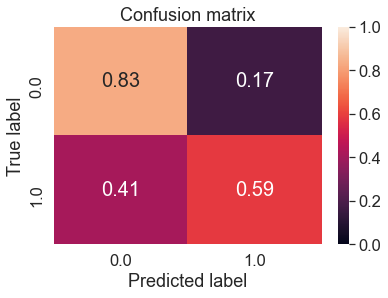

In [130]:
# visualizing cm

cm=confusion_matrix(y_train,y_pred)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes=lg_model.classes_, title='Confusion matrix')

In [131]:
prediction_lgtest=lg_model.predict(X=X_test)

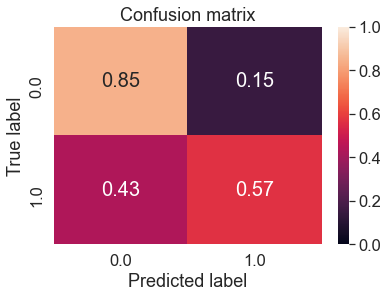

In [132]:
#Confusion Matrix for test
cm=confusion_matrix(y_test,prediction_lgtest)
cm_norm=cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=lg_model.classes_)

In [133]:
lg_model.classes_

array([0., 1.])

In [134]:
cm.sum(axis=1)
cm_norm

array([[0.8484375 , 0.1515625 ],
       [0.43287671, 0.56712329]])

In [135]:
cm

array([[1086,  194],
       [ 316,  414]], dtype=int64)

In [136]:
# Calculating FP,FN,TP,TN
FP= cm.sum(axis=0)-np.diag(cm)
FP

FN=cm.sum(axis=1)-np.diag(cm)
FN

TP=np.diag(cm)
TP
TN=cm.sum()-(FP+FN+TP)
TN

#Sensitivity,hit rate,recall or tpr
TPR=TP/(TP+FN)
print("True Positive Rate is:",TPR)

#Precision or positive predicted value
PPV= TP/(TP+FP)
print("The precision is:",PPV)

#False postive rate
FPR=FP/(FP+TN)
print("False Positive Rate is:",FPR)

#false Negative or miss rate
FNR=FN/(FN+TP)
print("False Negative Rate is:",FNR)

#Total averages
print("")
print("The average TPR is:",TPR.sum()/2)
print(" The average precision is:",PPV.sum()/2)
print(" The average FPR is:",FPR.sum()/2)
print(" The average FNR is:",FNR.sum()/2)

True Positive Rate is: [0.8484375  0.56712329]
The precision is: [0.7746077  0.68092105]
False Positive Rate is: [0.43287671 0.1515625 ]
False Negative Rate is: [0.1515625  0.43287671]

The average TPR is: 0.7077803938356164
 The average precision is: 0.727764377956303
 The average FPR is: 0.2922196061643836
 The average FNR is: 0.2922196061643836


In [137]:
log_loss(y_train,pred_proba)

0.5101811816440487

In [138]:
log_loss_lr = log_loss(y_train,pred_proba)

In [139]:
#Logarithmic loss or log loss or cross entropy loss

# Running log loss on training
print("The log loss on training is:",log_loss(y_train,pred_proba))

# Running log loss on testing
pred_proba_t=lg_model.predict_proba(X_test)
print("The log loss on testing is:",log_loss(y_test,pred_proba_t))

The log loss on training is: 0.5101811816440487
The log loss on testing is: 0.5051227588874133


In [140]:
pred_proba_t=lg_model.predict_proba(X_test)
pred_proba_t=pred_proba_t[:,1]

In [141]:
from sklearn.metrics import roc_auc_score
roc_score_lr=roc_auc_score(y_test,pred_proba_t)
print('ROC_AUC_Score:',roc_score_lr)

ROC_AUC_Score: 0.8042487157534247


In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

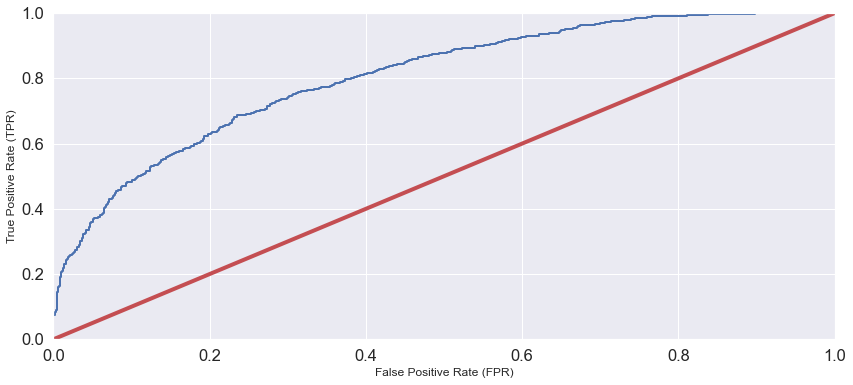

In [143]:
from sklearn.metrics import roc_curve
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_proba_t)

def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)',fontsize=12)
    plt.ylabel('True Positive Rate (TPR)',fontsize=12)
plt.figure(figsize=(14,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

## Decision Tree

In [144]:

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [145]:
X=df2.drop(columns=["Deal Status Code"])
y=df2["Deal Status Code"]

In [146]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=99)

In [147]:
dt=DecisionTreeClassifier(random_state=99) 
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

In [148]:
print("Train score :", dt.score(X_train, y_train))
print("Test score :", dt.score(X_test, y_test))

Train score : 0.9995023018539256
Test score : 0.7955223880597015


In [149]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[100,40,50,30], 
              'max_depth':[9,8,7,10],
              "min_samples_leaf":[33,30,35,32]
             }


tr = DecisionTreeClassifier()

gsearch = GridSearchCV(tr, parameters, cv=10, verbose=1, n_jobs=-1)
gsearch.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [9, 8, 7, 10],
                         'min_samples_leaf': [33, 30, 35, 32],
                         'min_samples_split': [100, 40, 50, 30]},
             verbose=1)

In [150]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 35,
 'min_samples_split': 50}

In [151]:
gsearch.best_score_

0.7485358078846118

In [152]:
dt_model=DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=30, min_samples_leaf=35)
dt_model.fit(X_train, y_train)
print("Train score :", dt_model.score(X_train, y_train))
print("Test score :", dt_model.score(X_test, y_test))

Train score : 0.7746671643648128
Test score : 0.7577114427860696


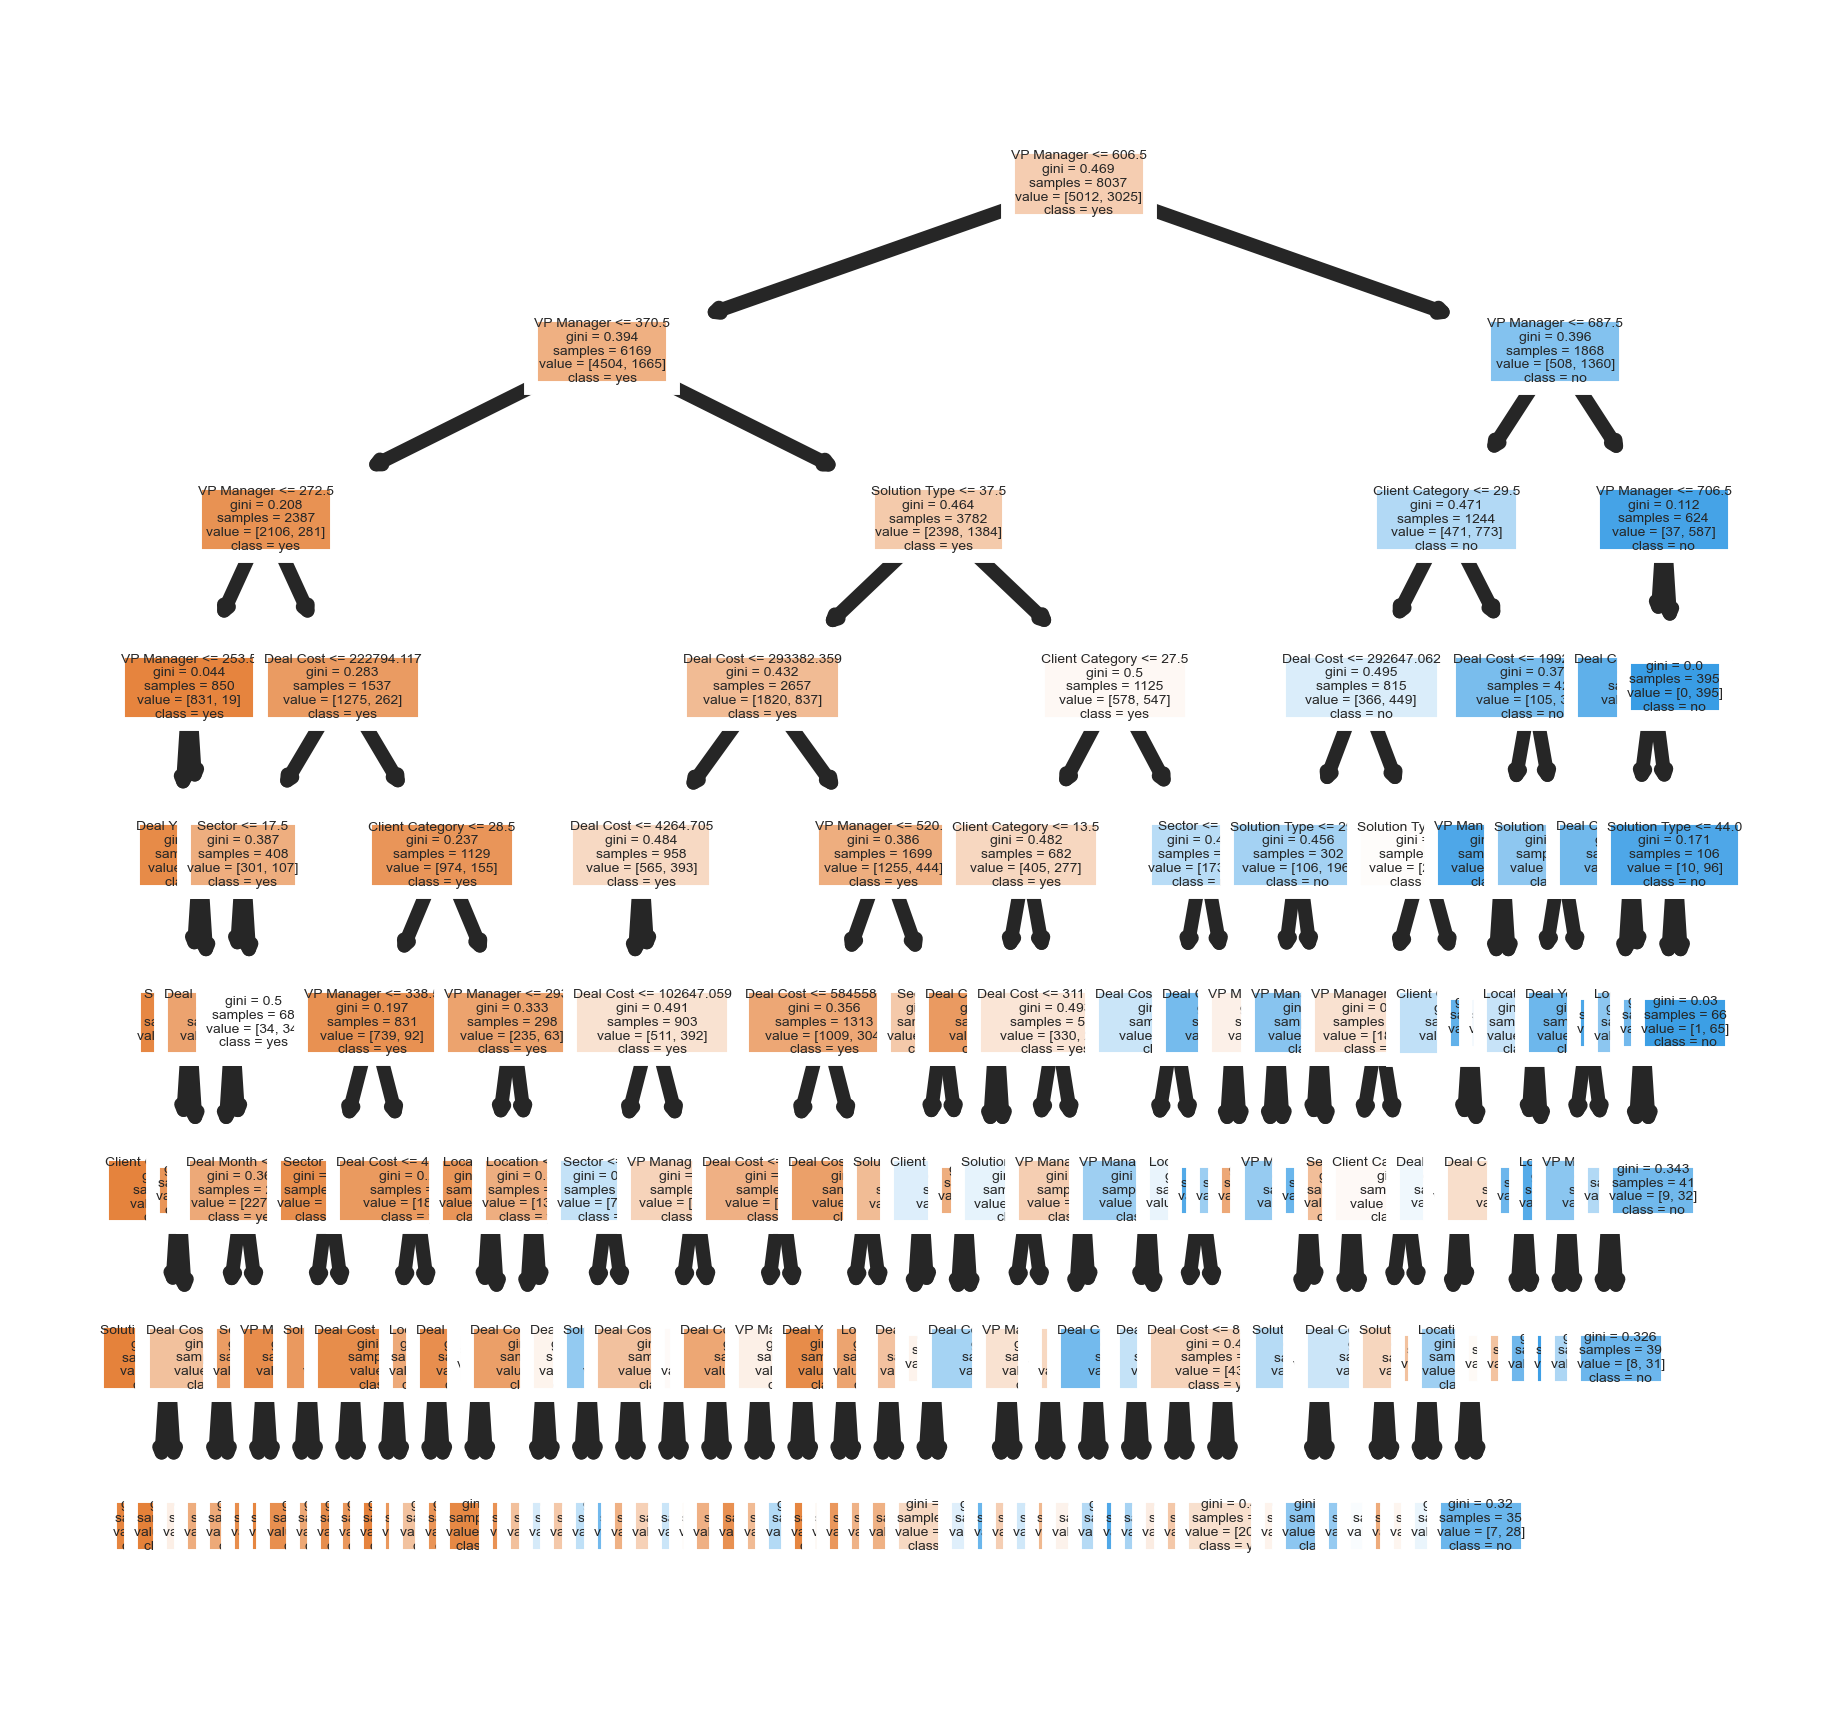

In [153]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=1000)

dt_plot=plot_tree(dt_model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [154]:
dt_model.predict(X_train)
y_predict=dt_model.predict(X_train)
y_predict

array([1, 0, 0, ..., 1, 0, 0])

In [155]:
#predict probab estimates
dt_proba=dt_model.predict_proba(X_train)
dt_proba

array([[0.45588235, 0.54411765],
       [0.91666667, 0.08333333],
       [0.63888889, 0.36111111],
       ...,
       [0.        , 1.        ],
       [0.84210526, 0.15789474],
       [0.58955224, 0.41044776]])

In [156]:
#evaluating model
#Accuracy on Train
print ("The Training Accuracy is:",dt_model.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",dt_model.score(X_test,y_test))

# Classification report
print(classification_report(y_train,y_predict))

The Training Accuracy is: 0.7746671643648128
The Testing Accuracy is: 0.7577114427860696
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      5012
           1       0.77      0.57      0.66      3025

    accuracy                           0.77      8037
   macro avg       0.77      0.73      0.74      8037
weighted avg       0.77      0.77      0.77      8037



In [157]:
#Confusion matrix function

def plot_confusion_matrix(cm,classes=None,title='Confusion matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0. , vmax=1. , annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm,vmin=0. , vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

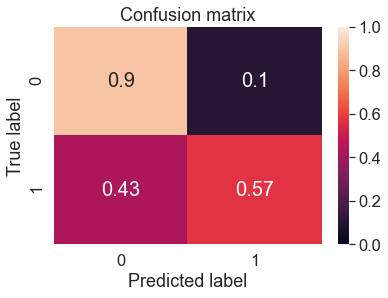

In [158]:
# visualizing cm

cm=confusion_matrix(y_train,y_predict)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes=dt_model.classes_, title='Confusion matrix')

In [159]:
prediction_dttest=dt.predict(X=X_test)

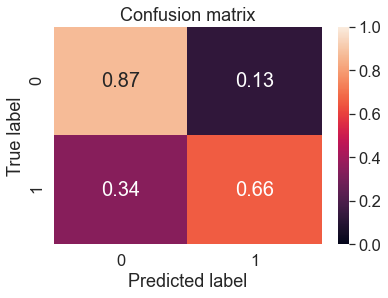

In [160]:
#Confusion Matrix for test
cm=confusion_matrix(y_test,prediction_dttest)
cm_norm=cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=dt_model.classes_)

In [161]:
lg_model.classes_

array([0., 1.])

In [162]:
cm.sum(axis=1)
cm_norm

array([[0.8734375 , 0.1265625 ],
       [0.34109589, 0.65890411]])

In [163]:
cm

array([[1118,  162],
       [ 249,  481]], dtype=int64)

In [164]:
log_loss(y_train,dt_proba)

0.4500135255231527

In [165]:
log_loss_dt=log_loss(y_train,dt_proba)

In [166]:
#Logarithmic loss or log loss or cross entropy loss

# Running log loss on training
print("The log loss on training is:",log_loss(y_train,dt_proba))

# Running log loss on testing
pred_proba_dt=dt_model.predict_proba(X_test)
print("The log loss on testing is:",log_loss(y_test,pred_proba_dt))

The log loss on training is: 0.4500135255231527
The log loss on testing is: 0.5155750633321129


In [167]:
pred_proba_dt=dt_model.predict_proba(X_test)
pred_proba_dt=pred_proba_dt[:,1]

In [168]:
from sklearn.metrics import roc_auc_score
roc_score_dt=roc_auc_score(y_test,pred_proba_dt)
print('ROC_AUC_Score:',roc_score_dt)

ROC_AUC_Score: 0.8147404751712328


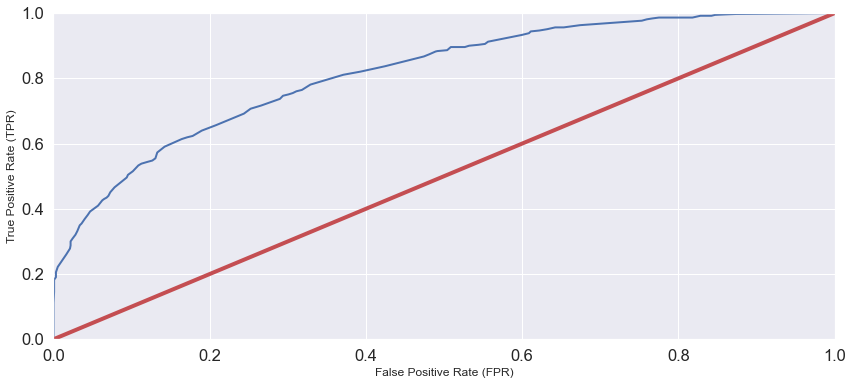

In [169]:
from sklearn.metrics import roc_curve
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_proba_dt)

def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)',fontsize=12)
    plt.ylabel('True Positive Rate (TPR)',fontsize=12)
plt.figure(figsize=(14,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

## Random Forest

In [170]:

from sklearn.ensemble import RandomForestClassifier

In [171]:
from sklearn.model_selection import GridSearchCV

parameters={"n_estimators" : [50,60,70],
            "criterion": ["gini", "entropy"],
            "max_depth" :[10,12, 8],
            "min_samples_split":[4,3,2],
            "min_samples_leaf" :[4,5,3],
            "max_features" :["log", "sqrt"],
            "bootstrap" : [True, False]
           }

rf=RandomForestClassifier()

rf_gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring="accuracy", verbose=True, n_jobs=-1, cv=10)
rf_gs.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 8],
                         'max_features': ['log', 'sqrt'],
                         'min_samples_leaf': [4, 5, 3],
                         'min_samples_split': [4, 3, 2],
                         'n_estimators': [50, 60, 70]},
             scoring='accuracy', verbose=True)

In [172]:
rf_gs.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 60}

In [173]:
rf=RandomForestClassifier(criterion='gini' ,max_depth=12, n_estimators= 60)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=60)

In [174]:
rf_model=rf.fit(X_train,y_train)
rf_model

RandomForestClassifier(max_depth=12, n_estimators=60)

In [175]:
rf_model.predict(X_train)
y_predictrf=rf_model.predict(X_train)
y_predictrf

array([1, 0, 0, ..., 1, 0, 0])

In [176]:
#predict probab estimates
rf_proba=rf_model.predict_proba(X_train)
rf_proba

array([[0.43760345, 0.56239655],
       [0.84354807, 0.15645193],
       [0.6565825 , 0.3434175 ],
       ...,
       [0.05379107, 0.94620893],
       [0.96217544, 0.03782456],
       [0.6925675 , 0.3074325 ]])

In [177]:
#Accuracy on Train
print ("The Training Accuracy is:",rf_model.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",rf_model.score(X_test,y_test))

The Training Accuracy is: 0.9080502675127535
The Testing Accuracy is: 0.7970149253731343


In [178]:
print("\n")
print("--------------------------Train classification report----------------------------------")
print(classification_report(y_train,y_predictrf))




--------------------------Train classification report----------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5012
           1       0.96      0.79      0.87      3025

    accuracy                           0.91      8037
   macro avg       0.92      0.88      0.90      8037
weighted avg       0.91      0.91      0.91      8037



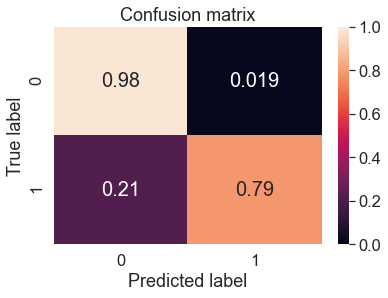

In [179]:
# visualizing cm for training
cm=confusion_matrix(y_train,y_predictrf)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes=rf_model.classes_, title='Confusion matrix')

In [180]:
prediction_rftest=rf.predict(X=X_test)

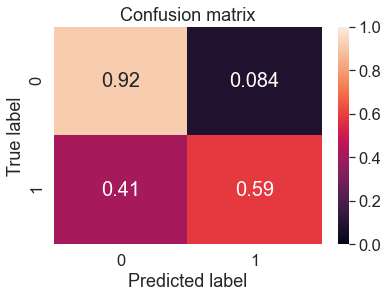

In [181]:
#Confusion Matrix for test
cm=confusion_matrix(y_test,prediction_rftest)
cm_norm=cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=rf_model.classes_)

In [182]:
cm.sum(axis=1)
cm_norm

array([[0.91640625, 0.08359375],
       [0.41232877, 0.58767123]])

In [183]:
cm

array([[1173,  107],
       [ 301,  429]], dtype=int64)

In [184]:
log_loss(y_train,rf_proba)

0.2984275149875929

In [185]:
log_loss_rt =log_loss(y_train,rf_proba)

In [186]:
#Logarithmic loss or log loss or cross entropy loss

# Running log loss on training
print("The log loss on training is:",log_loss(y_train,rf_proba))

# Running log loss on testing
pred_proba_rf=rf_model.predict_proba(X_test)
print("The log loss on testing is:",log_loss(y_test,pred_proba_rf))

The log loss on training is: 0.2984275149875929
The log loss on testing is: 0.4305375019396246


In [187]:
pred_proba_rf=rf_model.predict_proba(X_test)
pred_proba_rf=pred_proba_rf[:,1]

In [188]:
from sklearn.metrics import roc_auc_score
roc_score_rf=roc_auc_score(y_test,pred_proba_rf)
print('ROC_AUC_Score:',roc_score_rf)

ROC_AUC_Score: 0.8761622431506849


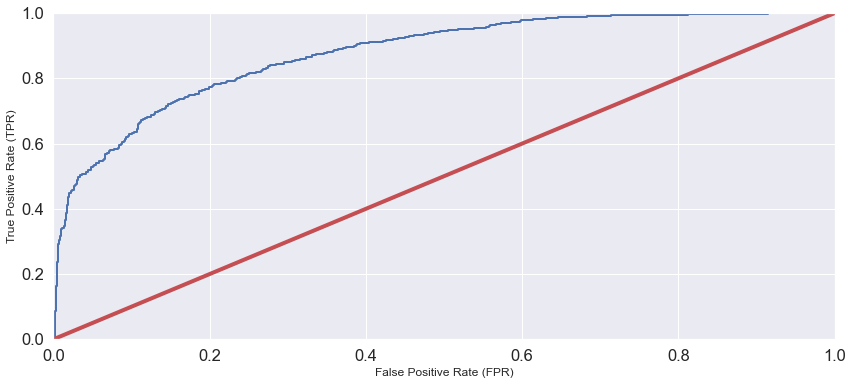

In [189]:
from sklearn.metrics import roc_curve
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_proba_rf)

def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)',fontsize=12)
    plt.ylabel('True Positive Rate (TPR)',fontsize=12)
plt.figure(figsize=(14,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

## SVM

In [190]:
from sklearn import metrics
from sklearn.svm import SVC 

In [191]:
clf = SVC()

In [192]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC()

In [193]:
sv_model=clf.fit(X_train,y_train)
sv_model

SVC()

In [194]:
print("Train score ", clf.score(X_train, y_train))
print("Test Score", clf.score(X_test, y_test))

#Predict the response for test dataset
#y_pred = clf.predict(X_train_scal)

Train score  0.6236157770312306
Test Score 0.6368159203980099


In [195]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [196]:
clf = SVC(# C= 100
        # kernel="linear"
                 gamma = 1
                   # degree = 5
                      )
sv_model = clf.fit(X_train, y_train)


param_grid={"C" : [0.1 ,1 ,100] , 
            "kernel" : ["linear" ,"rbf" , "poly"] , 
        #    "degree" : [1,2,,3,4,5] ,
              "gamma" : [0.1, 1, 10, 100] }
grid = GridSearchCV(estimator=SVC(), param_grid=parameters,scoring="accuracy", verbose=True, n_jobs=-1, cv=10)
grid.fit(X_train, y_trai

a.best_params_

print(grid.best_params_)
print("Train score ", grid.score(X_train, y_train))


In [197]:
sv_model.predict(X_train)
y_predictsv=sv_model.predict(X_train)
y_predictsv


array([1, 0, 0, ..., 1, 0, 0])

In [198]:
#predict probab estimates
#sv_proba=sv_model.predict_proba(X_train)
#sv_proba

In [199]:
#evaluating model
#Accuracy on Train
print ("The Training Accuracy is:",clf.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",clf.score(X_test,y_test))

# Classification report
print(classification_report(y_train,y_predictsv))

The Training Accuracy is: 0.999377877317407
The Testing Accuracy is: 0.6447761194029851
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5012
           1       1.00      1.00      1.00      3025

    accuracy                           1.00      8037
   macro avg       1.00      1.00      1.00      8037
weighted avg       1.00      1.00      1.00      8037



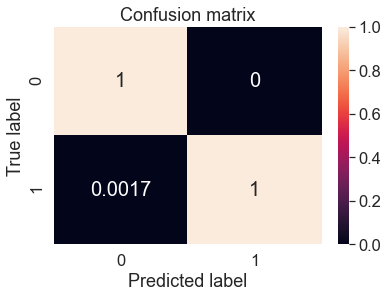

In [200]:
# visualizing cm for training
cm=confusion_matrix(y_train,y_predictsv)
cm_norm=cm/cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm,classes=sv_model.classes_, title='Confusion matrix')

In [201]:
prediction_svtest=clf.predict(X=X_test)

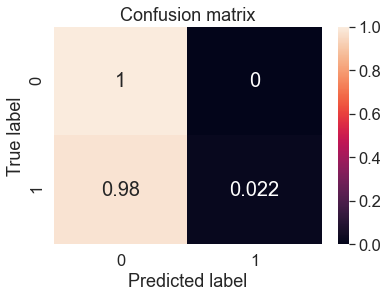

In [202]:
#Confusion Matrix for test
cm=confusion_matrix(y_test,prediction_svtest)
cm_norm=cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm,classes=sv_model.classes_)

In [203]:
cm.sum(axis=1)
cm_norm

array([[1.        , 0.        ],
       [0.97808219, 0.02191781]])

In [204]:
cm

array([[1280,    0],
       [ 714,   16]], dtype=int64)

In [205]:
log_loss(y_train,rf_proba)

0.2984275149875929

In [206]:
log_loss_svm = "NA"

In [207]:
from sklearn.metrics import roc_auc_score
roc_score_svm=roc_auc_score(y_test,prediction_svtest)
print('ROC_AUC_Score:',roc_score_svm)

ROC_AUC_Score: 0.510958904109589


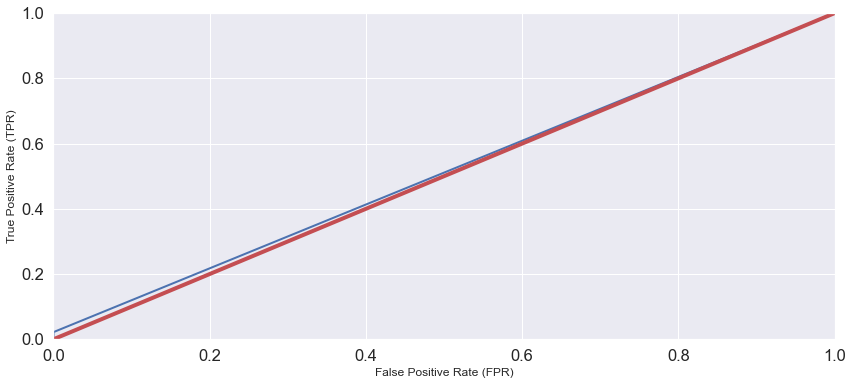

In [208]:
from sklearn.metrics import roc_curve
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,prediction_svtest)

def plot_roc_curve(false_positive_rate,true_positive_rate,label=None):
    plt.plot(false_positive_rate,true_positive_rate,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)',fontsize=12)
    plt.ylabel('True Positive Rate (TPR)',fontsize=12)
plt.figure(figsize=(14,6))
plot_roc_curve(false_positive_rate,true_positive_rate)
plt.show()

### Comparison of Models

In [209]:
Col_Name=["Model Name","Accuracy","Precision(Weighted)","Log Loss", "ROC"]

In [210]:
Model_Name=["Logistic Regression","Decision Tree","Random Forest","SVM"]

In [211]:
Accuracy=[round(lg_model.score(X_test,y_test),2),round(dt_model.score(X_test,y_test),2),round(rf_model.score(X_test,y_test),2),
         round(sv_model.score(X_test,y_test))]

In [212]:
Precision=[round(precision_recall_fscore_support(y_test,prediction_lgtest,average='weighted')[0],2),
         round(precision_recall_fscore_support(y_test,prediction_dttest,average='weighted')[0],2),
          round(precision_recall_fscore_support(y_test,prediction_rftest,average='weighted')[0],2),
           round(precision_recall_fscore_support(y_test,prediction_svtest,average='weighted')[0],2)]

In [213]:
Log_Loss=[log_loss_lr, log_loss_dt, log_loss_rt, log_loss_svm]

In [214]:
ROC=[roc_score_lr, roc_score_dt, roc_score_rf, roc_score_svm]

In [215]:
comp=(Model_Name,Accuracy,Precision,Log_Loss,ROC)

In [216]:
comp_df=pd.DataFrame(comp,)

In [217]:
comparison_df=pd.DataFrame(data=list(zip(Model_Name,Accuracy,Precision,Log_Loss,ROC)),columns=Col_Name)

In [218]:
comparison_df

,Model Name,Accuracy,Precision(Weighted),Log Loss,ROC
0,Logistic Regression,0.62,0.74,0.510181,0.804249
1,Decision Tree,0.76,0.79,0.450014,0.814740
2,Random Forest,0.80,0.80,0.298428,0.876162
3,SVM,1.00,0.77,NA,0.510959
